In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



# Загрузка данных
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Оставляем только два признака и целевую переменную
data = data[['sepal length (cm)', 'sepal width (cm)', 'target']]


In [9]:
# Разделяем данные на обучающую и тестовую выборки
X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
# Обучение модели LDA
lda = LDA()
lda.fit(X_train, y_train)

# Предсказания
y_pred = lda.predict(X_test)

# Метрика accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy модели LDA: {accuracy:.3f}")



Accuracy модели LDA: 0.756


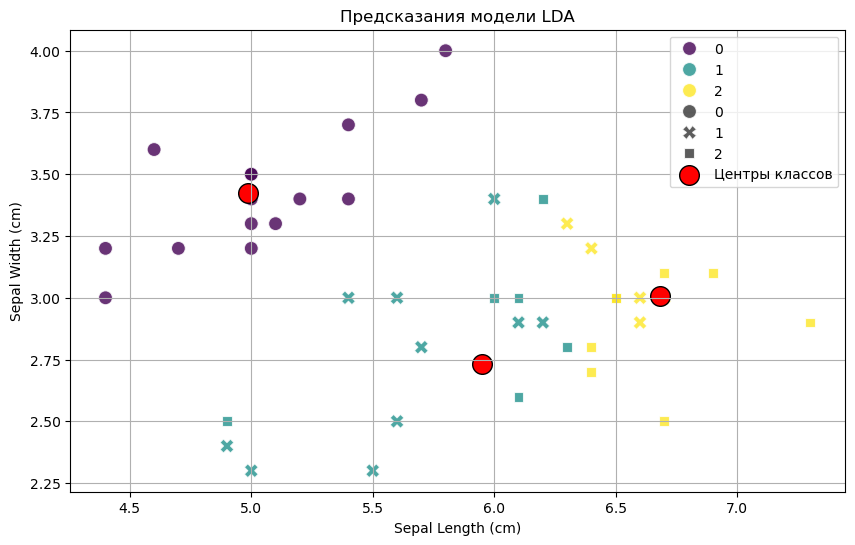

In [11]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], hue=y_pred, palette='viridis', style=y_test, s=100, alpha=0.8)
centroids = lda.means_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Центры классов', edgecolor='k')
plt.title("Предсказания модели LDA")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()



c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

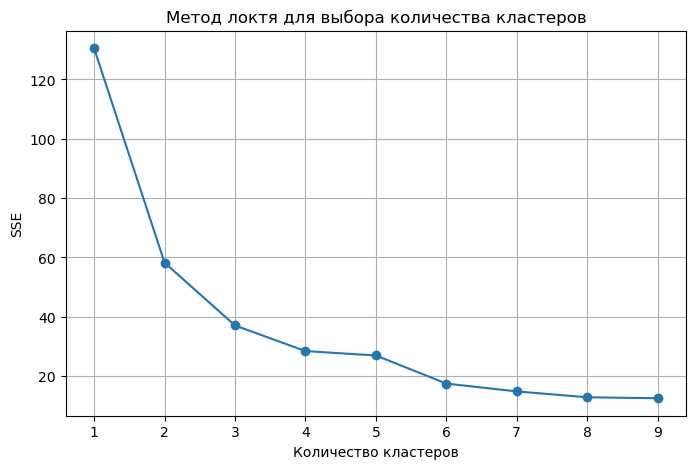

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Убираем целевую переменную
X_clustering = data[['sepal length (cm)', 'sepal width (cm)']]

# Подбор оптимального числа кластеров
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)

# Визуализация "локтя"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), sse, marker='o')
plt.title("Метод локтя для выбора количества кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

# Оптимальное число кластеров
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Добавляем метки кластеров в данные
data['cluster'] = clusters


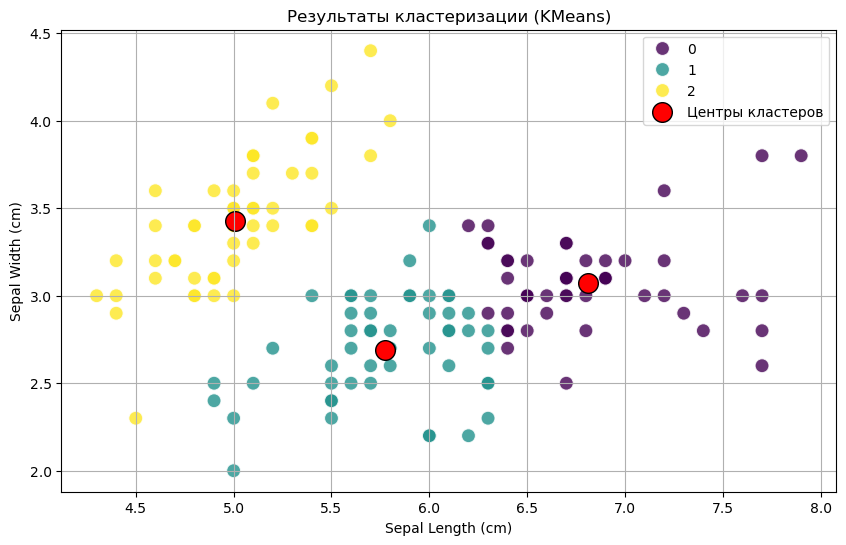

In [ ]:
# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['cluster'], palette='viridis', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, label='Центры кластеров', edgecolor='k')
plt.title("Результаты кластеризации (KMeans)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()
